In [1]:
# Importando os pacotes necessários
import py_dss_interface
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import math

In [ ]:
#Plotando curva de carga horária média para janeiro

plt.plot(jan_u['Hora'],jan_u['loadshape_pu'])
plt.title('Perfil de Carga em PU - Janeiro (Dias Úteis)')
plt.grid(axis='y')
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

In [ ]:
#Plotando curva de carga horária média para janeiro

plt.plot(jan_nu['Hora'],jan_nu['loadshape_pu'])
plt.title('Perfil de Carga em PU - Janeiro (Dias Não Úteis)')
plt.grid(axis='y')
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

In [ ]:
#Plotando curva de carga horária média para janeiro
plt.plot(jan_u['Hora'],jan_u['mean'])
plt.title('Curva de Carga Horária Média - Janeiro (Dias Úteis)')
plt.grid(axis='y')
plt.xlabel('Hora')
plt.ylabel('Carga')
plt.xticks(rotation=45)
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

In [ ]:
#Plotando curva de carga horária média para janeiro
plt.plot(jan_u['Hora'],jan_u['max'])
plt.title('Curva de Carga Horária Máxima - Janeiro (Dias Úteis)')
plt.grid(axis='y')
plt.xlabel('Hora')
plt.ylabel('Carga')
plt.xticks(rotation=45)
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

In [ ]:
#Plotando curva de carga horária média para fevereiro

plt.plot(fev_u['Hora'],fev_u['loadshape_pu'])
plt.title('Perfil de Carga em PU - Fevereiro (Dias Úteis)')
plt.grid(axis='y')
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

In [ ]:
#Plotando curva de carga horária média para fevereiro
plt.plot(fev_u['Hora'],fev_u['mean'])
plt.title('Curva de Carga Horária Média - Fevereiro')
plt.xticks(rotation=45)
plt.rcParams['xtick.labelsize'] = 7

In [ ]:
#Plotando curva de carga horária média para fevereiro
plt.plot(fev_u['Hora'],fev_u['max'])
plt.title('Curva de Carga Horária Máxima - Fevereiro')
plt.xticks(rotation=45)
plt.rcParams['xtick.labelsize'] = 7

In [2]:
# Criando o objeto "dss" e arquivo a ser compilado
dss_file = "C:\Projeto_Final\8500-Node\Master.dss"
dss = py_dss_interface.DSSDLL()

OpenDSS Started successfully! 
OpenDSS Version 9.4.0.1 (64-bit build); License Status: Open 




In [90]:
# Compilando arquivo com dados do sistema
dss.text("Clear")
dss.text("compile [{}]".format(dss_file))
# Inserindo um medidor de Energia no Alimentador que sai da subestação principal
alimentador = 'Line.ln5815900-1'
dss.text(f"New Energymeter.m1 {alimentador} 1")
# Inserindo um monitor das grandezas elétricas no Alimentador que sai da subestação principal
dss.text(f"New Monitor.m1_power {alimentador} terminal=1 mode=1 ppolar=False")
dss.text(f"New Monitor.m1_voltage {alimentador} terminal=1 mode=0 ppolar=False")
# Definindo itens de controle e iterações do software
dss.text("Set Maxiterations=20")
dss.text("Set maxcontrolit=100")

''

In [93]:
# ------------- MODO DAILY ------------- #

# Compilando arquivo com dados do sistema
dss.text("Clear")
dss.text("compile [{}]".format(dss_file))
# Inserindo um medidor de Energia no Alimentador que sai da subestação principal
alimentador = 'Line.ln5815900-1'
dss.text(f"New Energymeter.m1 {alimentador} 1")
# Inserindo um monitor das grandezas elétricas no Alimentador que sai da subestação principal
dss.text(f"New Monitor.m1_power {alimentador} terminal=1 mode=1 ppolar=False")
dss.text(f"New Monitor.m1_voltage {alimentador} terminal=1 mode=0 ppolar=False")
# Definindo itens de controle e iterações do software
dss.text("Set Maxiterations=20")
dss.text("Set maxcontrolit=100")
#Carregando o LoadShape
loadshape = '01loadshape_jan_u'
dss.text(f"New LoadShape.{loadshape} npts=24 interval=1 mult=(file={loadshape}.csv)")

''

In [94]:
#Definindo o LoadShape para todas as cargas
dss.text(f"Batchedit Load..* daily={loadshape}")

#resolvendo modo daily
dss.text("set mode=daily")
dss.text("set number=24")
dss.text("set stepsize=1h")
dss.solution_solve()

0

In [95]:
# Ativando Monitor de Potência no Alimentador
dss.monitors_write_name("m1_power")
pa = dss.monitors_channel(1)
qa = dss.monitors_channel(2)
pb = dss.monitors_channel(3)
qb = dss.monitors_channel(4)
pc = dss.monitors_channel(5)
qc = dss.monitors_channel(6)
pt = np.array(pa) + np.array(pb) + np.array(pc)
qt = np.array(qa) + np.array(qb) + np.array(qc)

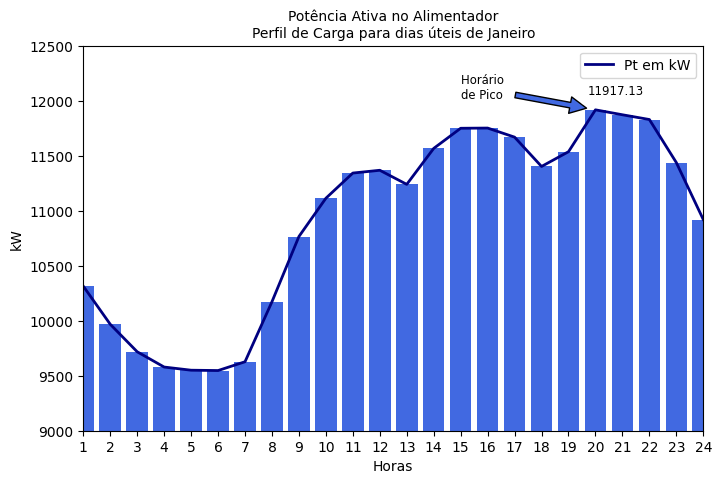

In [96]:
# Gráfico de Potência Ativa Fornecida pelo Alimentador
x = list(range(1, 1 +len(pt)))
y = pt
plt.figure(figsize=(8, 5))
plt.bar(x,y,color = "royalblue")
plt.plot(x,y, "navy", label = 'Pt em kW',linewidth = 2)
plt.title("Potência Ativa no Alimentador\nPerfil de Carga para dias úteis de Janeiro",fontsize = 'medium')
plt.ylabel("kW", fontsize = 'medium')
plt.xlabel("Horas", fontsize = 'medium')
plt.legend(loc='best')
plt.xlim(1,24)
plt.ylim(9000,12500)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.annotate('Horário \nde Pico',
            fontsize = 'small',
            backgroundcolor='white',
            xy = (pt.argmax()+1, pt.max()),
            xytext = (pt.argmax()-4, pt.max()+100),
            )
plt.annotate("",
            xy = (pt.argmax()+1, pt.max()),
            fontsize = 'small',
            xytext = (pt.argmax()-2.3, pt.max()+150),
            arrowprops = dict(facecolor='royalblue', shrink=0.1),
            )
plt.annotate(text = repr(round(pt.max(),2)),
            xy=(19.7,12055),
            fontsize='small',
            backgroundcolor='white',
            )
#plt.grid(True)
plt.show()  


In [ ]:
# Gráfico de Potência Reativa fornecida pelo Alimentador
x = list(range(1, 1 +len(qt)))
y = qt
plt.figure(figsize=(6, 4))
plt.bar(x,y,color = "darkorange")
plt.plot(x,y, "red", label = 'Qt em kVAr',linewidth = 2)
plt.title("Potência Reativa no Alimentador\nPerfil de Carga para dias úteis de Janeiro", fontsize = 'medium')
plt.ylabel("kVAr", fontsize = 'medium')
plt.xlabel("Horas", fontsize = 'medium')
plt.legend(loc='best')
plt.xlim(1,24)
plt.ylim(-550,800)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.grid(True)

plt.annotate('Horário \nde Pico',
            fontsize = 'small',
            backgroundcolor='white',
            xy=(qt.argmax()+1, qt.max()),
            xytext=(qt.argmax()-4, qt.max()+80),
            )
plt.annotate("",
            xy = (qt.argmax()+1, qt.max()),
            fontsize = 'small',
            xytext = (qt.argmax()-2.3, qt.max()+100),
            arrowprops = dict(facecolor='darkorange', shrink=0.1)
            )
plt.annotate(text = repr(round(qt.max(),2)),
            xy=(19,610),
            fontsize = 'small',
            backgroundcolor='white'
            )
plt.annotate('Horário \nde Máxima \nAbsorção',
            fontsize = 'small',
            xy=(qt.argmin()+1, qt.min()),
            xytext=(qt.argmin()+5, qt.min()-80),
            backgroundcolor='white'
            )
plt.annotate("",
            xy = (qt.argmin()+1, qt.min()),
            fontsize = 'small',
            xytext = (qt.argmin()+5, qt.min()-50),
            arrowprops = dict(facecolor='darkorange', shrink=0.1)
            )
plt.annotate(text = repr(round(qt.min(),2)),
            xy=(4,-360),
            fontsize = 'small'
            )

plt.show()

In [ ]:
# Ativando o Monitor de Tensões e Correntes
dss.monitors_write_name("m1_voltage")
v1 = np.round(np.array(dss.monitors_channel(1))/10**3, 3)
v2 = np.round(np.array(dss.monitors_channel(3))/10**3, 3)
v3 = np.round(np.array(dss.monitors_channel(5))/10**3, 3)
i1 = np.round(np.array(dss.monitors_channel(7)), 3)
i2 = np.round(np.array(dss.monitors_channel(9)), 3)
i3 = np.round(np.array(dss.monitors_channel(11)), 3)

In [ ]:
# Tensões por Fase no Alimentador
plt.plot(list(range(1, 1 + len(v1))), v1, "r", label = 'V1')
plt.plot(list(range(1, 1 + len(v2))), v2, "b", label = 'V2')
plt.plot(list(range(1, 1 + len(v3))), v3, "g", label = 'V3')
plt.title("Tensões por Fase no Alimentador\nPerfil de Carga para dias úteis de Janeiro")
plt.ylabel("kV")
plt.xlabel("Horas")
plt.legend()
plt.xlim(1,24)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.ylim(7.2,7.8)
plt.grid(True)
plt.show()

In [ ]:
# Corrente por Fase no Alimentador
plt.plot(list(range(1, 1 + len(i1))), i1, "r", label = 'I1')
plt.plot(list(range(1, 1 + len(i2))), i2, "b", label = 'I2')
plt.plot(list(range(1, 1 + len(i3))), i3, "g", label = 'I3')
plt.title("Correntes por Fase no Alimentador\nPerfil de Carga para dias úteis de Janeiro")
plt.ylabel("Ampères")
plt.xlabel("Horas")
plt.legend()
plt.xlim(1,24)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.ylim(350,600)
plt.grid(True)
plt.show()

In [ ]:
# ativando o medidor do ramal de alimentação
dss.meters_write_name("m1")
reg_meters_names = dss.meters_register_names()
reg_meters_values = dss.meters_register_values()
reg_meters_values = list(map(lambda x: round(x, 2), reg_meters_values))
meters = pd.DataFrame(reg_meters_names, columns=["Medidas"])
meters["Valores"] = reg_meters_values
meters = meters.set_index("Medidas")
meters = meters[(meters['Valores']!=0)]
meters.to_excel('C:\Projeto_Final\Tabelas_e_imagens\medidores.xlsx')



In [ ]:
#-------------- CENÁRIO COM BATERIA --------------#

# Compilando arquivo com dados do sistema
dss.text("Clear")
dss.text("compile [{}]".format(dss_file))
# Inserindo um medidor de Energia no Alimentador que sai da subestação principal
alimentador = 'Line.ln5815900-1'
dss.text(f"New Energymeter.m1 {alimentador} 1")
# Inserindo um monitor das grandezas elétricas no Alimentador que sai da subestação principal
dss.text(f"New Monitor.m1_power {alimentador} terminal=1 mode=1 ppolar=False")
dss.text(f"New Monitor.m1_voltage {alimentador} terminal=1 mode=0 ppolar=False")
# Definindo itens de controle e iterações do software
dss.text("Set Maxiterations=20")
dss.text("Set maxcontrolit=100")
# Carregando o LoadShape
loadshape = '01loadshape_jan_u'
dss.text(f"New LoadShape.{loadshape} npts=24 interval=1 mult=(file={loadshape}.csv)")
#Definindo o LoadShape para todas as cargas
dss.text(f"Batchedit Load..* daily={loadshape}")

# Definindo a Bateria
dss.text("New Loadshape.Storage interval=1 npts=24 mult = [0, 0, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 1, 1, 1, 0, 0]")
dss.text("New XYCurve.Eff npts=4 xarray=[.1 .2 .4 1.0] yarray=[.86 .9 .93 .97]")
dss.text("New Storage.Storage1 phases=3 bus1=m1166366 kV=12.47 kwrated=200 kwhrated=1000 dispmode=follow daily=Storage %stored = 0")

#resolvendo modo daily
dss.text("set mode=daily")
dss.text("set number=24")
dss.text("set stepsize=1h")
dss.solution_solve()

In [ ]:
# Ativando Monitor de Potência no Alimentador
dss.monitors_write_name("m1_power")
pa1 = dss.monitors_channel(1)
qa1 = dss.monitors_channel(2)
pb1 = dss.monitors_channel(3)
qb1 = dss.monitors_channel(4)
pc1 = dss.monitors_channel(5)
qc1 = dss.monitors_channel(6)
pt1 = np.array(pa1) + np.array(pb1) + np.array(pc1)
qt1 = np.array(qa1) + np.array(qb1) + np.array(qc1)

In [ ]:
# Gráfico de Potência Ativa Fornecida pelo Alimentador
x = list(range(1, 1 +len(pt1)))
y = pt1
plt.figure(figsize=(8, 5))
plt.bar(x,y,color = "limegreen")
plt.plot(x,y, "darkgreen", label = 'Pt em kW',linewidth = 2)
plt.title("Potência Ativa no Alimentador\nPerfil de Carga para dias úteis de Janeiro",fontsize = 'medium')
plt.ylabel("kW", fontsize = 'medium')
plt.xlabel("Horas", fontsize = 'medium')
plt.legend(loc='best')
plt.xlim(1,24)
plt.ylim(9000,12500)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.annotate('Horário \nde Pico',
            fontsize = 'small',
            backgroundcolor='white',
            xy = (pt1.argmax()+1, pt1.max()),
            xytext = (pt1.argmax()-4, pt1.max()+100),
            )
plt.annotate("",
            xy = (pt1.argmax()+1, pt1.max()),
            fontsize = 'small',
            xytext = (pt1.argmax()-2.3, pt1.max()+150),
            arrowprops = dict(facecolor='royalblue', shrink=0.1),
            )
plt.annotate(text = repr(round(pt1.max(),2)),
            xy=(19.7,12055),
            fontsize='small',
            backgroundcolor='white',
            )
#plt.grid(True)
plt.show()  

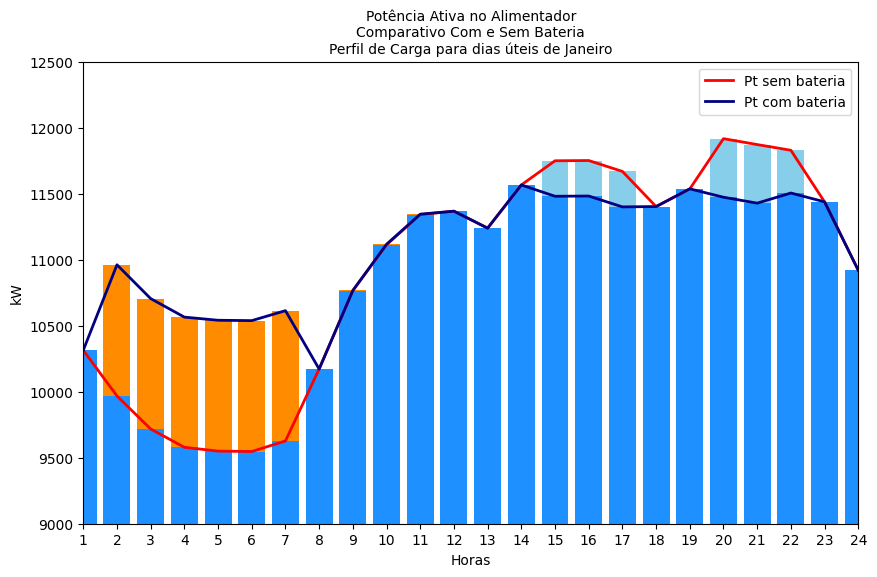

In [109]:
# Gráfico Comparativo - Com e Sem Bateria

x = list(range(1, 1 +len(pt)))
y = pt

x1 = list(range(1, 1 +len(pt1)))
y1 = pt1

plt.figure(figsize=(10, 6))
plt.bar(x1[:17],y1[:17],color = "darkorange")
plt.bar(x[:17],y[:17],color = "dodgerblue")
plt.bar(x[14:],y[14:],color = "skyblue")
plt.bar(x1[14:],y1[14:],color = "dodgerblue")
plt.plot(x,y, "r", label = 'Pt sem bateria',linewidth = 2)
plt.plot(x1,y1, "navy", label = 'Pt com bateria',linewidth = 2)
plt.title("Potência Ativa no Alimentador\nComparativo Com e Sem Bateria\nPerfil de Carga para dias úteis de Janeiro",fontsize = 'medium')
plt.ylabel("kW", fontsize = 'medium')
plt.xlabel("Horas", fontsize = 'medium')
plt.legend(loc='best')
plt.xlim(1,24)
plt.ylim(9000,12500)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.show()

In [104]:
#-------------- CENÁRIO COM BATERIA PEAKSHAVE --------------#

# Compilando arquivo com dados do sistema
dss.text("Clear")
dss.text("compile [{}]".format(dss_file))
# Inserindo um medidor de Energia no Alimentador que sai da subestação principal
alimentador = 'Line.ln5815900-1'
dss.text(f"New Energymeter.m1 {alimentador} 1")
# Inserindo um monitor das grandezas elétricas no Alimentador que sai da subestação principal
dss.text(f"New Monitor.m1_power {alimentador} terminal=1 mode=1 ppolar=False")
dss.text(f"New Monitor.m1_voltage {alimentador} terminal=1 mode=0 ppolar=False")
# Definindo itens de controle e iterações do software
dss.text("Set Maxiterations=5000")
dss.text("Set maxcontrolit=5000")
# Carregando o LoadShape
loadshape = '01loadshape_jan_u'
dss.text(f"New LoadShape.{loadshape} npts=24 interval=1 mult=(file={loadshape}.csv)")
#Definindo o LoadShape para todas as cargas
dss.text(f"Batchedit Load..* daily={loadshape}")

#dss.text("BatchEdit CapControl.. *enabled=False")
#dss.text("BatchEdit RegControl.. *enabled=False")

# Definindo a curva de eficiencia do inversor
dss.text("New XYCurve.Eff npts=4 xarray=[.1 .2 .4 1.0] yarray=[.86 .9 .93 .97]")

# Definindo a Bateria
dss.text("New Storage.Storage1 phases=3 bus1=m1166366 kV=12.47 %idlingkW=1 kwrated=1192 kwhrated=4768 dispmode=peakShave %stored=0 EffCurve=Eff vminpu=0.95 vmaxpu=1.05")
dss.text("New Monitor.Storage1 element=Storage.Storage1 mode=3")

dss.text(f"New StorageController.Storage1 element={alimentador} terminal=1 modedis=peakShave MonPhase=AVG kwtarget=11500 modecharge=Time timeChargeTrigger=2 %rateCharge=80 timeDischargeTrigger=19 %reserve=0 eventlog=yes")

#resolvendo modo daily
#dss.text("Set maxcontroliter=2000")
dss.text("Set mode=daily")
dss.text("Set number=24")
dss.text("Set stepsize=1h")
dss.solution_solve()

#dss.text("Show Eventlog")

0

In [105]:
# Ativando Monitor de Potência no Alimentador
dss.monitors_write_name("m1_power")
pa1 = dss.monitors_channel(1)
qa1 = dss.monitors_channel(2)
pb1 = dss.monitors_channel(3)
qb1 = dss.monitors_channel(4)
pc1 = dss.monitors_channel(5)
qc1 = dss.monitors_channel(6)
pt1 = np.array(pa1) + np.array(pb1) + np.array(pc1)
qt1 = np.array(qa1) + np.array(qb1) + np.array(qc1)

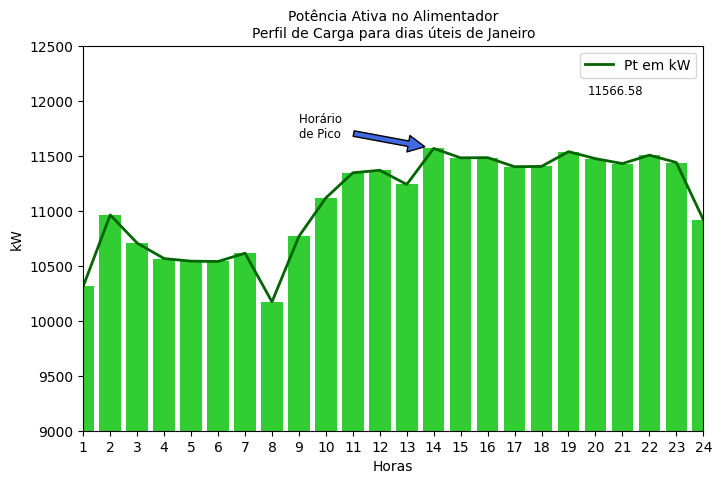

In [106]:
# Gráfico de Potência Ativa Fornecida pelo Alimentador
x = list(range(1, 1 +len(pt1)))
y = pt1
plt.figure(figsize=(8, 5))
plt.bar(x,y,color = "limegreen")
plt.plot(x,y, "darkgreen", label = 'Pt em kW',linewidth = 2)
plt.title("Potência Ativa no Alimentador\nPerfil de Carga para dias úteis de Janeiro",fontsize = 'medium')
plt.ylabel("kW", fontsize = 'medium')
plt.xlabel("Horas", fontsize = 'medium')
plt.legend(loc='best')
plt.xlim(1,24)
plt.ylim(9000,12500)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.annotate('Horário \nde Pico',
            fontsize = 'small',
            backgroundcolor='white',
            xy = (pt1.argmax()+1, pt1.max()),
            xytext = (pt1.argmax()-4, pt1.max()+100),
            )
plt.annotate("",
            xy = (pt1.argmax()+1, pt1.max()),
            fontsize = 'small',
            xytext = (pt1.argmax()-2.3, pt1.max()+150),
            arrowprops = dict(facecolor='royalblue', shrink=0.1),
            )
plt.annotate(text = repr(round(pt1.max(),2)),
            xy=(19.7,12055),
            fontsize='small',
            backgroundcolor='white',
            )
#plt.grid(True)
plt.show()  

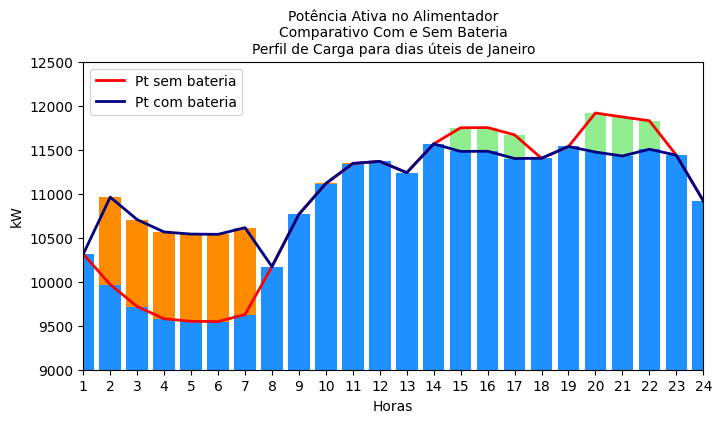

In [122]:
# Gráfico Comparativo - Com e Sem Bateria

x = list(range(1, 1 +len(pt)))
y = pt

x1 = list(range(1, 1 +len(pt1)))
y1 = pt1

plt.figure(figsize=(8, 4))
plt.bar(x1[:17],y1[:17],color = "darkorange")
plt.bar(x[:17],y[:17],color = "dodgerblue")
plt.bar(x[14:],y[14:],color = "lightgreen")
plt.bar(x1[14:],y1[14:],color = "dodgerblue")
plt.plot(x,y, "r", label = 'Pt sem bateria',linewidth = 2)
plt.plot(x1,y1, "navy", label = 'Pt com bateria',linewidth = 2)
plt.title("Potência Ativa no Alimentador\nComparativo Com e Sem Bateria\nPerfil de Carga para dias úteis de Janeiro",fontsize = 'medium')
plt.ylabel("kW", fontsize = 'medium')
plt.xlabel("Horas", fontsize = 'medium')
plt.legend(loc='best')
plt.xlim(1,24)
plt.ylim(9000,12500)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.show()

In [116]:
# Ativando Monitor de Potência na Bateria
dss.text("Export monitors Storage1")
dss.monitors_write_name("Storage1")
Storage_Charge = dss.monitors_channel(1)
Storage_State = dss.monitors_channel(2)
Storage_Discharge = dss.monitors_channel(3)

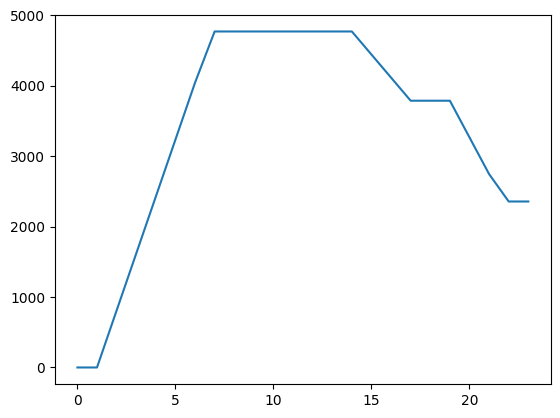

In [119]:
plt.plot(Storage_Charge)